In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition, preprocessing
import numpy as np
#from factor_analyzer import FactorAnalyzer
import math
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.utils import resample
from sklearn.model_selection import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pickle

In [2]:
full_data = pd.read_csv("CompiledDataset.csv")
full_data.head(30)

,Season,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,18-19,E0,10/8/18,Man United,Leicester,2,1,H,1,0,...,8,2,5,2,1,0,0,1.57,3.90,7.50
1,18-19,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,...,9,7,4,1,1,0,0,1.90,3.60,4.50
2,18-19,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,...,11,5,5,1,2,0,0,2.50,3.40,3.00
3,18-19,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,...,8,2,5,2,1,0,0,6.50,4.00,1.61
4,18-19,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,...,12,3,5,2,2,0,0,3.90,3.50,2.04
5,18-19,E0,11/8/18,Watford,Brighton,2,0,H,1,0,...,16,8,2,2,2,0,0,2.37,3.20,3.40
6,18-19,E0,11/8/18,Wolves,Everton,2,2,D,1,1,...,7,3,6,0,1,0,1,2.37,3.30,3.30
7,18-19,E0,12/8/18,Arsenal,Man City,0,2,A,0,1,...,14,2,9,2,2,0,0,4.00,3.80,1.95
8,18-19,E0,12/8/18,Liverpool,West Ham,4,0,H,2,0,...,9,5,4,1,2,0,0,1.25,6.50,14.00
9,18-19,E0,12/8/18,Southampton,Burnley,0,0,D,0,0,...,9,8,5,0,1,0,0,1.85,3.50,5.00


In [3]:
conditions = [(full_data['FTR']=='H'),(full_data['FTR']=='D'),(full_data['FTR']=='A')]
values = [3,1,0]
full_data['FTHP'] = np.select(conditions, values)
full_data.head(10)

,Season,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,FTHP
0,18-19,E0,10/8/18,Man United,Leicester,2,1,H,1,0,...,2,5,2,1,0,0,1.57,3.9,7.50,3
1,18-19,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,...,7,4,1,1,0,0,1.90,3.6,4.50,3
2,18-19,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,...,5,5,1,2,0,0,2.50,3.4,3.00,0
3,18-19,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,...,2,5,2,1,0,0,6.50,4.0,1.61,0
4,18-19,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,...,3,5,2,2,0,0,3.90,3.5,2.04,0
5,18-19,E0,11/8/18,Watford,Brighton,2,0,H,1,0,...,8,2,2,2,0,0,2.37,3.2,3.40,3
6,18-19,E0,11/8/18,Wolves,Everton,2,2,D,1,1,...,3,6,0,1,0,1,2.37,3.3,3.30,1
7,18-19,E0,12/8/18,Arsenal,Man City,0,2,A,0,1,...,2,9,2,2,0,0,4.00,3.8,1.95,0
8,18-19,E0,12/8/18,Liverpool,West Ham,4,0,H,2,0,...,5,4,1,2,0,0,1.25,6.5,14.00,3
9,18-19,E0,12/8/18,Southampton,Burnley,0,0,D,0,0,...,8,5,0,1,0,0,1.85,3.5,5.00,1


In [4]:
full_data['HTD'] = full_data['HTHG'] - full_data['HTAG']
full_data['FTD'] = full_data['FTHG'] - full_data['FTAG']
full_data.head(10)

,Season,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,HY,AY,HR,AR,B365H,B365D,B365A,FTHP,HTD,FTD
0,18-19,E0,10/8/18,Man United,Leicester,2,1,H,1,0,...,2,1,0,0,1.57,3.9,7.50,3,1,1
1,18-19,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,...,1,1,0,0,1.90,3.6,4.50,3,1,2
2,18-19,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,...,1,2,0,0,2.50,3.4,3.00,0,-1,-2
3,18-19,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,...,2,1,0,0,6.50,4.0,1.61,0,-2,-3
4,18-19,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,...,2,2,0,0,3.90,3.5,2.04,0,-1,-1
5,18-19,E0,11/8/18,Watford,Brighton,2,0,H,1,0,...,2,2,0,0,2.37,3.2,3.40,3,1,2
6,18-19,E0,11/8/18,Wolves,Everton,2,2,D,1,1,...,0,1,0,1,2.37,3.3,3.30,1,0,0
7,18-19,E0,12/8/18,Arsenal,Man City,0,2,A,0,1,...,2,2,0,0,4.00,3.8,1.95,0,-1,-2
8,18-19,E0,12/8/18,Liverpool,West Ham,4,0,H,2,0,...,1,2,0,0,1.25,6.5,14.00,3,2,4
9,18-19,E0,12/8/18,Southampton,Burnley,0,0,D,0,0,...,0,1,0,0,1.85,3.5,5.00,1,0,0


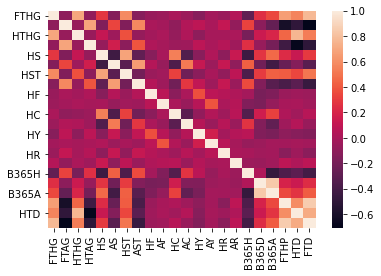

In [5]:
sns.heatmap(full_data.corr())

In [6]:
home_data = full_data[['HomeTeam', 'HTHG', 'HTR', 'HTAG', 'FTHG', 'FTAG', 'FTR', 'FTHP', 'HTD', 'FTD']].copy()
home_data.head(10)

,HomeTeam,HTHG,HTR,HTAG,FTHG,FTAG,FTR,FTHP,HTD,FTD
0,Man United,1,H,0,2,1,H,3,1,1
1,Bournemouth,1,H,0,2,0,H,3,1,2
2,Fulham,0,A,1,0,2,A,0,-1,-2
3,Huddersfield,0,A,2,0,3,A,0,-2,-3
4,Newcastle,1,A,2,1,2,A,0,-1,-1
5,Watford,1,H,0,2,0,H,3,1,2
6,Wolves,1,D,1,2,2,D,1,0,0
7,Arsenal,0,A,1,0,2,A,0,-1,-2
8,Liverpool,2,H,0,4,0,H,3,2,4
9,Southampton,0,D,0,0,0,D,1,0,0


In [7]:
home_data.corr()

,HTHG,HTAG,FTHG,FTAG,FTHP,HTD,FTD
HTHG,1.000000,-0.058358,0.699799,-0.065368,0.446860,0.765805,0.538563
HTAG,-0.058358,1.000000,-0.082422,0.692972,-0.423929,-0.686668,-0.499577
FTHG,0.699799,-0.082422,1.000000,-0.100248,0.662272,0.562696,0.773949
FTAG,-0.065368,0.692972,-0.100248,1.000000,-0.607124,-0.493994,-0.707644
FTHP,0.446860,-0.423929,0.662272,-0.607124,1.000000,0.598491,0.856717
HTD,0.765805,-0.686668,0.562696,-0.493994,0.598491,1.000000,0.714001
FTD,0.538563,-0.499577,0.773949,-0.707644,0.856717,0.714001,1.000000


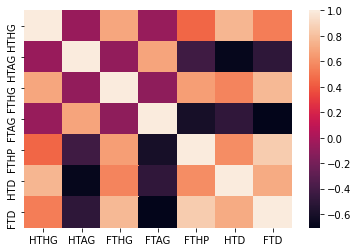

In [8]:
sns.heatmap(home_data.corr())

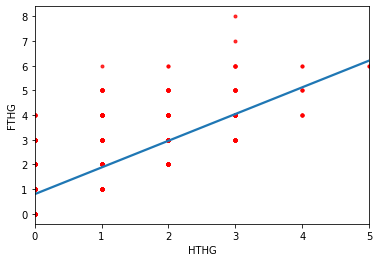

In [9]:
sns.regplot(full_data.HTHG, full_data.FTHG, order=1, ci=None, scatter_kws={'color':'r','s':9})

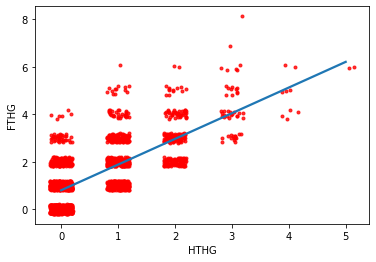

In [10]:
sns.regplot(full_data.HTHG, full_data.FTHG, order=1, ci=None,
            scatter_kws={'color':'r','s':9}, x_jitter=.2, y_jitter=.2)

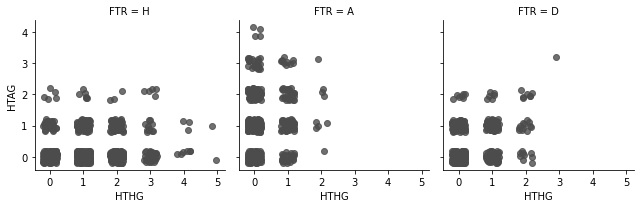

In [11]:
g = sns.FacetGrid(full_data, col='FTR', margin_titles=True)
g.map(sns.regplot, 'HTHG', 'HTAG', color='.3', fit_reg=False,x_jitter=.2, y_jitter=.2);


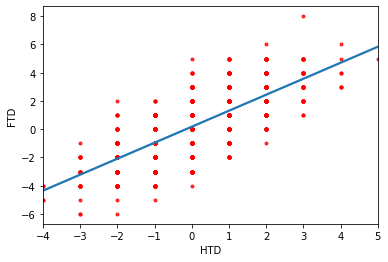

In [12]:
sns.regplot(full_data.HTD, full_data.FTD, order=1, ci=None, scatter_kws={'color':'r','s':9})

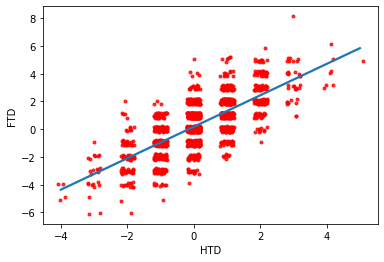

In [13]:
sns.regplot(full_data.HTD, full_data.FTD, order=1, ci=None,
            scatter_kws={'color':'r','s':9}, x_jitter=.2, y_jitter=.2)

In [14]:
X = full_data[['HTD', 'HTHG']]
y = full_data['FTD']
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.5099609880738378

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [16]:
regb = LinearRegression().fit(X_train, y_train)
regb.score(X_train, y_train)

0.5035355727155573

In [17]:
y_pred = regb.predict(X_test)

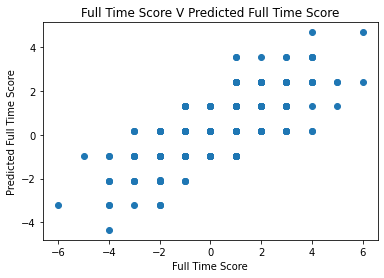

In [18]:
plt.scatter(y_test, y_pred)
plt.title('Full Time Score V Predicted Full Time Score')
plt.xlabel('Full Time Score')
plt.ylabel('Predicted Full Time Score')
plt.show()

In [19]:
mean_squared_error(y_test, y_pred)

1.6155912038101137

In [20]:
r2_score(y_test, y_pred)

0.5332903153054023

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, datasets
Logistic= linear_model.LogisticRegression()

In [22]:
logisticRegr=Logistic.fit(X_train, y_train)

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
logisticRegr.score(X_train,y_train)

0.3427631578947368

In [24]:
logisticRegr.score(X_test,y_test)

0.31842105263157894

In [25]:
logisticRegr.predict(X_test)

array([ 2,  2,  2, -1,  0,  2,  0, -1,  0,  2,  2,  2,  0,  2,  0,  0,  2,
        0, -1,  0,  0, -1,  0, -1,  0,  0,  2,  0,  0, -1,  2,  2,  0,  0,
        0,  0,  0,  2,  0,  0,  2,  0,  0, -1, -1,  0, -1, -1,  2,  2,  2,
        0,  0,  0, -1, -1, -1,  2,  0,  0,  0,  0,  0,  0,  0,  2, -1,  0,
        0,  0,  0, -1, -3,  2,  2,  0, -1,  0, -1, -1,  0,  0,  0,  2,  2,
       -1,  2,  2, -1,  0,  0, -1,  0, -3, -1, -1,  0, -1,  3,  2, -1,  0,
        0, -1,  2,  0,  2,  0,  0, -1, -1, -1,  0,  2, -1,  2,  0, -1, -1,
        2,  0,  2,  2,  2,  3, -1,  0,  0,  2,  0,  0, -1,  2, -1,  0,  2,
        0,  0,  0,  2, -1,  0, -2, -1,  2,  2,  5,  0, -1,  0,  0,  2,  0,
        0,  0, -1, -3,  0,  0,  2,  0,  0,  2,  2,  0,  0, -3,  0,  2,  0,
        0,  0,  0,  0,  0, -1,  3,  0,  2, -3,  0,  0,  2,  0,  3,  2,  2,
       -1, -1,  0,  2,  2,  0,  0, -1,  3,  2,  2,  0, -1,  0,  2,  3,  2,
       -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0, -1, -1,  2,  2, -1,
        0,  0,  0,  2,  0

In [26]:
pred = logisticRegr.predict(X_test)
predProbs = logisticRegr.predict_proba(X_test)
predProbs

array([[3.75178045e-05, 3.93097553e-06, 2.89115033e-04, ...,
        3.12372146e-02, 1.14511607e-02, 6.95394202e-04],
       [1.44368688e-06, 5.97662301e-08, 1.53982115e-05, ...,
        1.14739368e-01, 6.46491558e-02, 2.48914577e-03],
       [3.80642113e-05, 4.19917708e-06, 5.77305041e-04, ...,
        6.64031909e-02, 3.74481664e-02, 2.54050198e-03],
       ...,
       [2.66544238e-03, 1.88354845e-03, 2.11022998e-02, ...,
        5.10307907e-04, 1.21822501e-04, 2.05591265e-05],
       [8.84360392e-03, 1.66533374e-02, 9.95591129e-02, ...,
        3.71642142e-05, 8.87996741e-06, 2.64052343e-06],
       [2.66544238e-03, 1.88354845e-03, 2.11022998e-02, ...,
        5.10307907e-04, 1.21822501e-04, 2.05591265e-05]])

In [27]:
print(logisticRegr.coef_)
print(logisticRegr.intercept_)

[[-1.88308163 -0.27387219]
 [-2.86321037 -0.22233014]
 [-2.23512673  0.40321506]
 [-1.55430252 -0.2918653 ]
 [-1.0160534  -0.11312114]
 [-0.56847317 -0.42855148]
 [ 0.26823737 -0.48511514]
 [ 0.7961     -0.43158448]
 [ 1.5872511  -0.22960073]
 [ 2.22916798 -0.29682087]
 [ 1.93591077  0.46580386]
 [ 1.93501     0.89653556]
 [ 1.36857059  1.007307  ]]
[-3.0075565  -4.33489781 -1.29058962  0.93130844  1.93325625  3.12344274
  3.74049493  3.33603388  2.41376757  0.89216502 -0.84167514 -2.27502512
 -4.62072465]


In [28]:
probs = predProbs[:, 1]

print(probs)

[3.93097553e-06 5.97662301e-08 4.19917708e-06 1.66533374e-02
 1.32498547e-04 3.93097553e-06 1.12090808e-04 1.88354845e-03
 1.32498547e-04 3.93097553e-06 4.19917708e-06 5.97662301e-08
 1.32498547e-04 3.93097553e-06 1.12090808e-04 1.32498547e-04
 3.93097553e-06 1.12090808e-04 1.88354845e-03 1.12090808e-04
 1.32498547e-04 1.66533374e-02 1.32498547e-04 1.88354845e-03
 1.12090808e-04 1.32498547e-04 5.00931283e-08 1.32498547e-04
 1.12090808e-04 2.12084797e-03 5.97662301e-08 5.97662301e-08
 1.12090808e-04 1.12090808e-04 1.12090808e-04 1.12090808e-04
 1.32498547e-04 3.93097553e-06 1.12090808e-04 1.32498547e-04
 5.97662301e-08 1.32498547e-04 1.12090808e-04 1.66533374e-02
 1.88354845e-03 1.12090808e-04 1.88354845e-03 1.88354845e-03
 4.19917708e-06 3.93097553e-06 3.93097553e-06 1.12090808e-04
 1.12090808e-04 1.12090808e-04 2.12084797e-03 1.88354845e-03
 1.88354845e-03 3.93097553e-06 1.12090808e-04 1.12090808e-04
 1.32498547e-04 1.12090808e-04 1.12090808e-04 1.32498547e-04
 1.12090808e-04 4.199177

In [29]:
lr_scores_test=[]
lr_scores_train=[]
for this_C in (.1,2):
    logisticRegr= LogisticRegression(C=this_C).fit(X_train, y_train)
    lr_scores_test.append(logisticRegr.score(X_test, y_test))
    lr_scores_train.append(logisticRegr.score(X_train, y_train))
    pred = logisticRegr.predict(X_test)
    predProbs = logisticRegr.predict_proba(X_test)
    probs = predProbs[:, 1]
    cm1 = confusion_matrix(y_test, pred)
    cm1

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
cm1

array([[ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  2,  0,  5,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  9,  3,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  2, 20,  7,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26, 30,  0,  7,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10, 54,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 10, 47,  0, 37,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0, 35,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  6,  0, 14,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0,  6,  3,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0]])

In [31]:
lr_scores_test

[0.3105263157894737, 0.31842105263157894]

In [32]:
lr_scores_train

[0.34407894736842104, 0.3427631578947368]

In [33]:
X1 = full_data[['HTD', 'HTAG']]
y1 = full_data['FTD']
reg = LinearRegression().fit(X1, y1)
reg.score(X, y)

0.5092018317880402

In [34]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size = 0.2)

In [35]:
regb1 = LinearRegression().fit(X1_train, y1_train)
regb1.score(X1_train, y1_train)

0.5089782926362476

In [36]:
y1_pred = regb1.predict(X1_test)

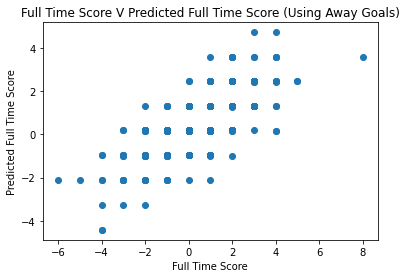

In [37]:
plt.scatter(y1_test, y1_pred)
plt.title('Full Time Score V Predicted Full Time Score (Using Away Goals)')
plt.xlabel('Full Time Score')
plt.ylabel('Predicted Full Time Score')
plt.show()

In [38]:
mean_squared_error(y1_test, y1_pred)

1.6289459060535425

In [39]:
r2_score(y1_test, y1_pred)

0.5129016590719992

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, datasets
Logistic1= linear_model.LogisticRegression()

In [41]:
logisticRegr1=Logistic1.fit(X1_train, y1_train)

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
logisticRegr1.score(X1_train,y1_train)

0.3394736842105263

In [43]:
logisticRegr1.score(X1_test,y1_test)

0.3368421052631579

In [44]:
from sklearn.model_selection import cross_val_score
scores1 = cross_val_score(logisticRegr, X1,y1,cv=20)
scores1
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std() * 2))

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"
/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Accuracy: 0.33 (+/- 0.08)


/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logisticRegr, X,y,cv=20)
scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"
/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Accuracy: 0.33 (+/- 0.08)


/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(logisticRegr, X, y, cv=5)
sorted(cv_results.keys())
['fit_time', 'score_time', 'test_score']
cv_results['test_score']
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Accuracy: 0.33 (+/- 0.08)


/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
df_new=pd.concat([X_train,y_train],axis=1, sort=False)

In [48]:
df_new_majority = df_new[df_new['FTD']== 0]
df_new_minority = df_new[df_new['FTD']==1]
#
### Upsample minority class
df_new_minority_upsampled = resample(df_new_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=df_new['FTD'].value_counts()[0],     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_new_upsampled = pd.concat([df_new_minority_upsampled, df_new_majority])
#df_new_upsampled= df_new_upsampled.sample(frac=.1)
df_new_upsample=shuffle(df_new_upsampled)
df_new_upsampled['FTD'].value_counts()

1    384
0    384
Name: FTD, dtype: int64

In [49]:
X_train1=df_new_upsampled.drop(['FTD'],axis=1)
y_train1=df_new_upsampled.get('FTD')

In [52]:
(min(full_data['HTD']))


-4

In [53]:
(max(full_data['HTD']))

5

In [54]:
(min(full_data['FTD']))

-6

In [55]:
(max(full_data['FTD']))

8

In [56]:
#look into scalling data mean=0, normalize variance, classification of labels, needs to be in nips, 
#github account for for december final paper. 

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


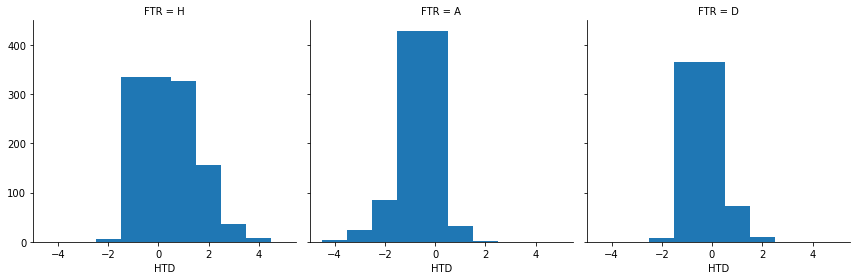

In [57]:
bins = [-4.5,-3.5,-2.5,-1.5,0.5,1.5,2.5,3.5,4.5,5,5]
g = sns.FacetGrid(full_data, col='FTR', margin_titles=True, size=4)
g.map(plt.hist, 'HTD', bins=bins)

/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/conorward/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


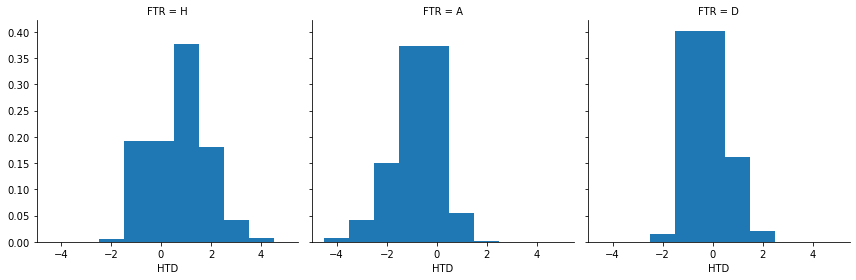

In [58]:
g = sns.FacetGrid(full_data, col='FTR', margin_titles=True, size=4)
g.map(plt.hist, 'HTD', bins=bins, density=True)